In [ ]:
# import the necessary packages needed f
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import io

uploaded = files.upload()

Saving USD_KES 2014 - 2024 DATA.csv to USD_KES 2014 - 2024 DATA.csv


In [ ]:
#read the data into a dataframe
# check the information for analysis
df = pd.read_csv(io.BytesIO(uploaded['USD_KES 2014 - 2024 DATA.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2835 non-null   object 
 1   Price     2835 non-null   float64
 2   Open      2835 non-null   float64
 3   High      2835 non-null   float64
 4   Low       2835 non-null   float64
 5   Vol.      1013 non-null   object 
 6   Change %  2835 non-null   object 
dtypes: float64(4), object(3)
memory usage: 155.2+ KB


In [ ]:
# Convert the Series to a DataFrame
# Set the date as index
# Sort the dates in order they appear
# Make the values of the exchange rates to numeric data
# Drop unnecessary columns
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2835 entries, 2014-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2835 non-null   float64
dtypes: float64(1)
memory usage: 44.3 KB


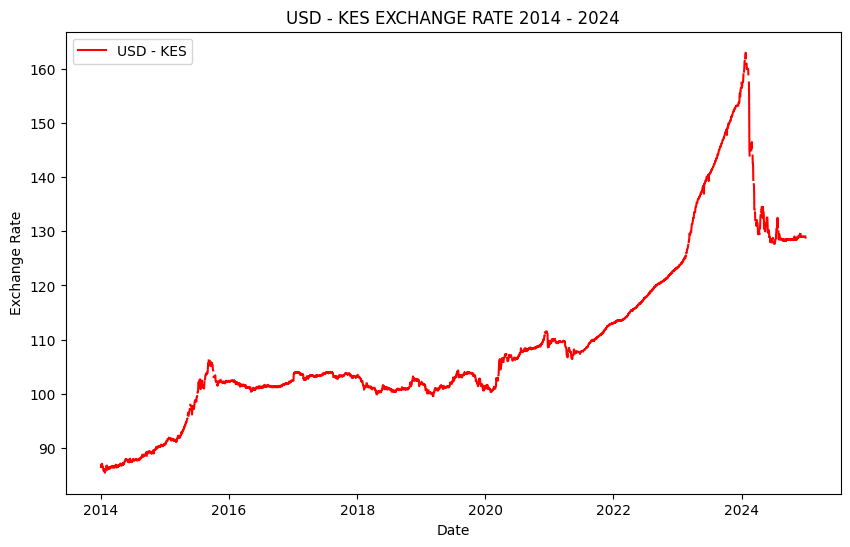

In [ ]:
# Resample the data indexes to daily data point to identify the missing dates
# Plot the all data points of all the dates.
df = df.resample("D").mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

<ipython-input-7-83fc98a740e7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


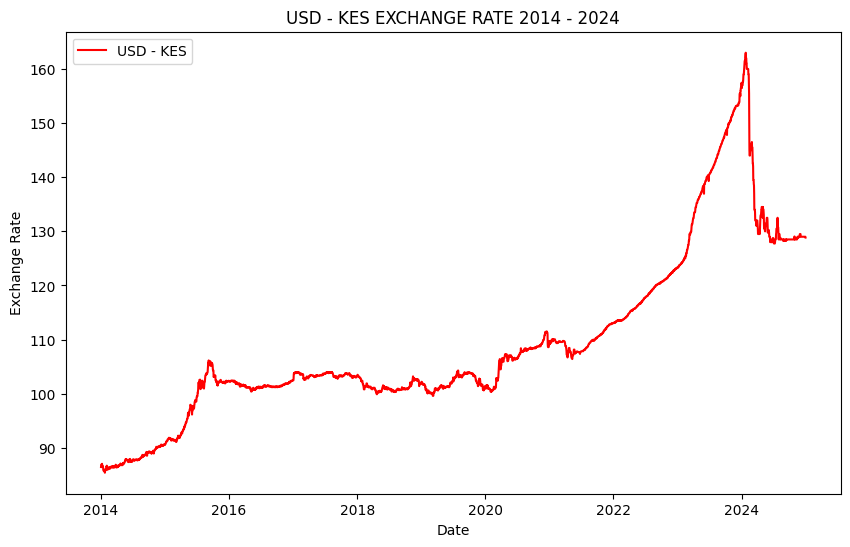

In [ ]:
# Since the data contains missing values, using forward fill, fill the gaps
# Plot the all data points of all the dates after filling.
df.fillna(method='ffill', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

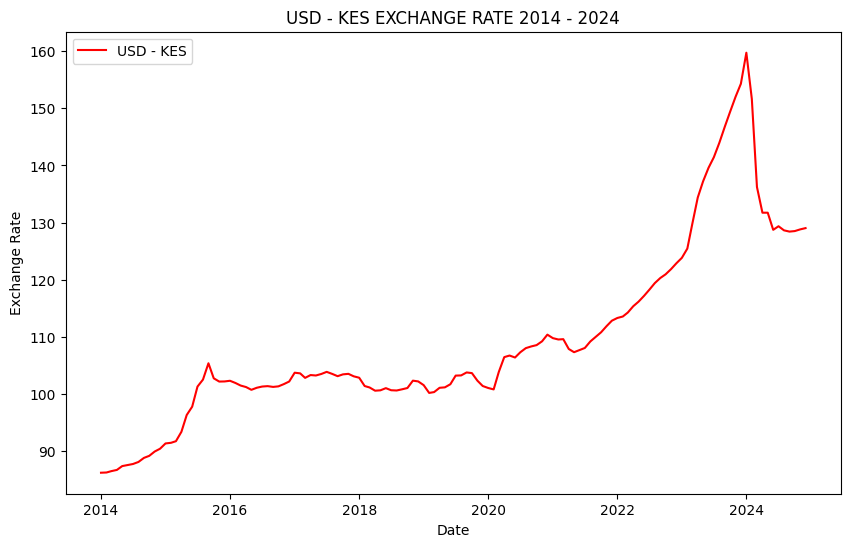

In [ ]:
# Resample the data to mean monthly value (month start)
# Plot the all data points of all the dates.
df = df.resample("MS").mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:

# Check for stationarity of the data
# Perform the Augmented Dickey-Fuller (ADF) test
# Extract and print the test statistic and p-value

result = adfuller(df['Price'])

adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -1.4417342507016808
p-value: 0.5621128529320161
Critical Values {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


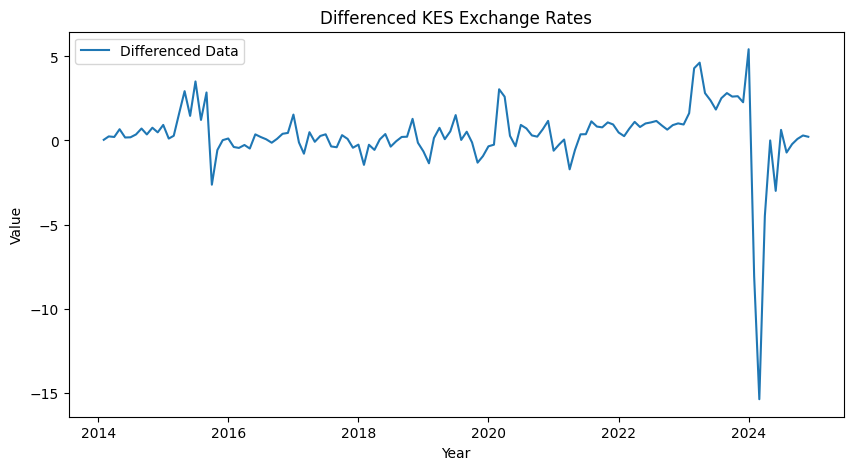

In [ ]:
# Since the value of p is greater than 0.05 then the data is Non-stationary
# Therefore we difference the data and check for its stationarity
# Plot the differenced time series data
df['Differenced_Data'] = df['Price'].diff()
df = df.dropna()
plt.figure(figsize=(10, 5))
plt.title("Differenced KES Exchange Rates")
plt.plot(df.index, df['Differenced_Data'], label='Differenced Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Check for stationarity of the data
# Perform the Augmented Dickey-Fuller (ADF) test
# Extract and print the test statistic and p-value
result = adfuller(df['Differenced_Data'])

adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print('Critical Values',result[4])

ADF Statistic: -4.851986098325228
p-value: 4.3209774398325066e-05
Critical Values {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


<Figure size 1000x600 with 0 Axes>

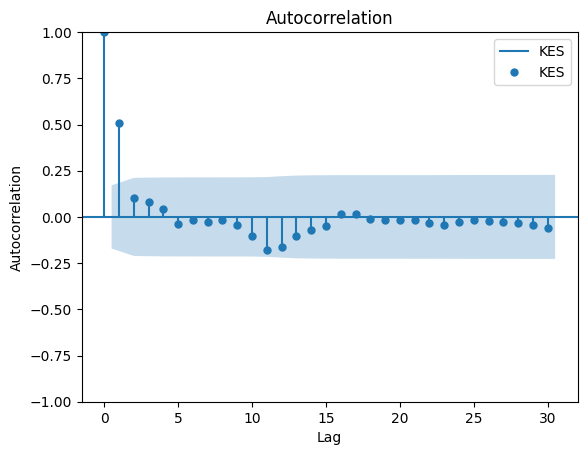

In [ ]:
# Plot the ACF plot to check for the lag values and draw q
plt.figure(figsize=(10, 6))
plot_acf(df['Differenced_Data'], lags=30, label = "KES")
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

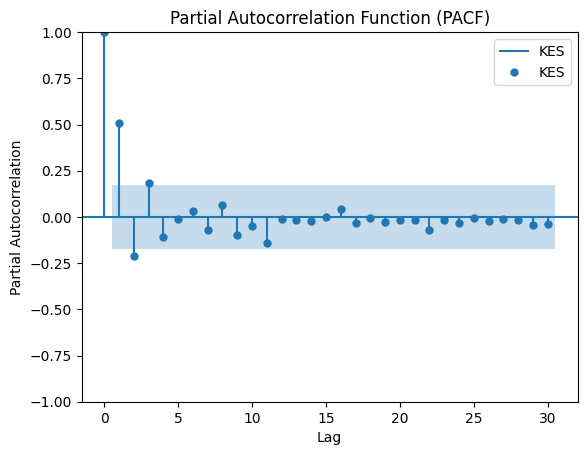

In [ ]:
# Plot the PACF plot to check the lag values and draw p
plt.figure(figsize=(10, 6))
plot_pacf(df['Differenced_Data'], label = "KES",lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend()
plt.show()

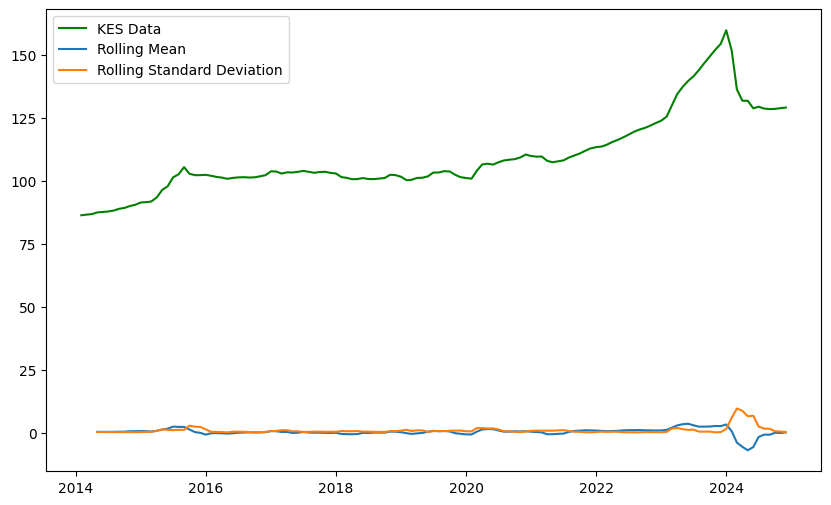

In [ ]:
# Plot Mean, Standard Deviation of the data
plt.figure(figsize=(10, 6))
window_size = 4 # Quarterly window
rolling_mean = df['Differenced_Data'].rolling(window=window_size).mean()
rolling_std = df['Differenced_Data'].rolling(window=window_size).std()
plt.plot(df['Price'], color = 'g', label = 'KES Data')
plt.plot(rolling_mean, label = "Rolling Mean")
plt.plot(rolling_std, label = "Rolling Standard Deviation")
plt.legend();

In [ ]:
# Import pmdarima to help with the selection of the best p, d, q values
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00


In [ ]:
# After importing we can use the pmdarima to help us get reasonable values for p, d, q
from pmdarima import auto_arima

auto_model = auto_arima(df['Differenced_Data'], seasonal=False, trace=True)
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=519.905, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=563.517, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=524.011, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=516.088, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=516.191, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=516.201, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=517.950, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=516.225, Time=0.58 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.924 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -256.044
Date:                Thu, 13 Feb 2025   AIC                            516.088
Time:                        18:28:48   BIC                            521.838
Sample:                    02-01-2014   HQIC                           518.424
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6019      0.022     27.053      0.000       0.558  

In [ ]:
# From the output we have found the best p, d, q values to be (0, 0, 1)
# We can split the data into test and train data for the model
cutoff_test = int(len(df) * 0.93)

df_train = df['Differenced_Data'].iloc[:cutoff_test]
df_test = df['Differenced_Data'].iloc[cutoff_test:]

len(df_train) + len(df_test) == len(df)

True

In [ ]:
# We train our model with the suggested p, d, q values and adjust to best fit (4, 0, 2)
model = ARIMA(df_train, order=(4,0,2))
model_fit = model.fit()
pred = model_fit.predict(start = len(df_train), end = len(df_train) + len(df_test) - 1)
print(pred)

2024-03-01    0.084689
2024-04-01   -2.421644
2024-05-01   -0.250437
2024-06-01   -0.803111
2024-07-01    0.012271
2024-08-01   -0.257977
2024-09-01    0.216248
2024-10-01   -0.045231
2024-11-01    0.329304
2024-12-01    0.048357
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


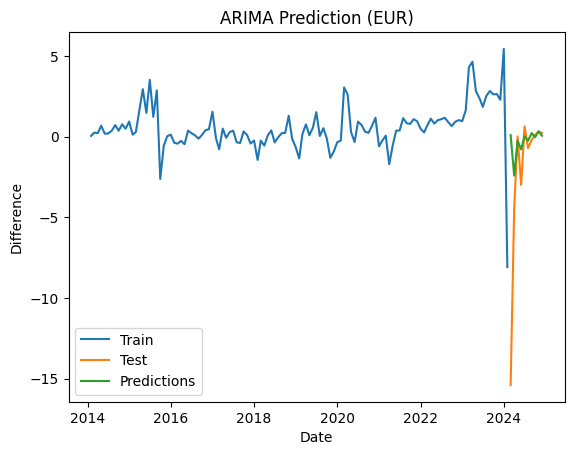

In [ ]:
# We plot the values of our trained data to check if it's best fit
# We could adjust eh model to suit the situation
pred_df = pd.DataFrame(pred)
pred_df.index = pred_df.index
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(pred_df, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('ARIMA Prediction (EUR)')
plt.legend()
plt.show()

In [ ]:
# Get the mean_absolute_error, mean_squared_error, mean_squared_error
# The values indicate that the model successfully captured the trend in the dataset and is reliable, like the observation from the graph!
mae = mean_absolute_error(df_test, pred_df)
mse = mean_squared_error(df_test, pred_df)
rmse = np.sqrt(mean_squared_error(df_test, pred_df))
perf = {'Currency':'','MAE': mae, 'MSE': mse,
'RMSE': rmse}
perf = pd.DataFrame([perf])
perf

,Currency,MAE,MSE,RMSE
0,,2.185584,24.968182,4.996817


In [ ]:
# Set the forecasting index to the last date of the dataset, periods of 12 to show the next 12 months
forecast_index = pd.date_range(start = '2024-12-01', periods =12, freq = 'MS')

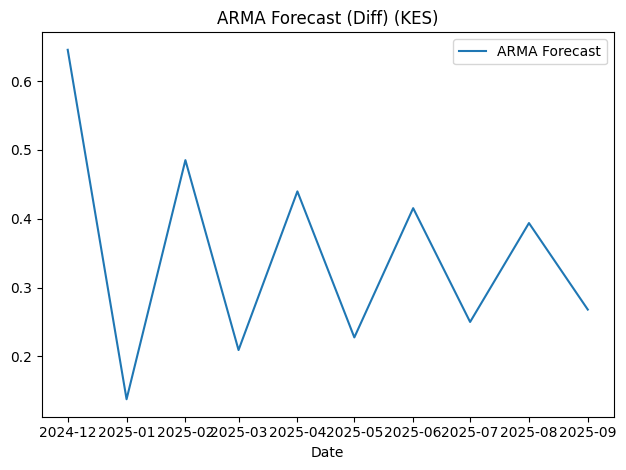

In [ ]:
kes = ARIMA(df['Differenced_Data'], order = (4, 0, 2))
kes_model = kes.fit()
kes_forecast = kes_model.forecast(steps=12)
kes_forecast.index = forecast_index
plt.plot(df['Differenced_Data'][:], label='Actual')
plt.plot(kes_forecast, label='ARMA Forecast')
plt.title('ARMA Forecast (Diff) (KES)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()
# From the graph we could see a steady rise and fall maintain exchange rates around the same mean over the coming year.

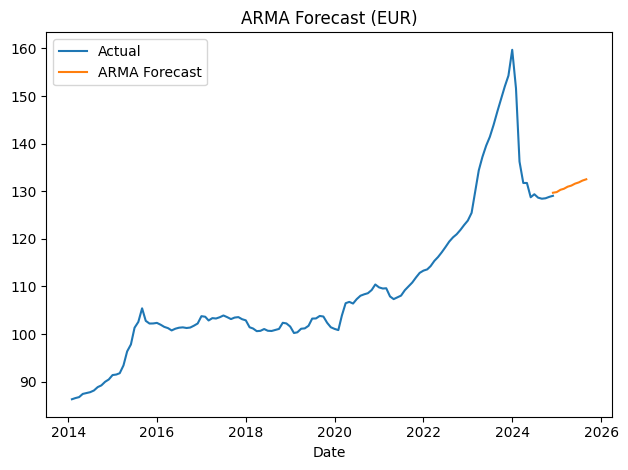

In [ ]:
# Using forecast rates obtain from the differenced data we ccould append the values to the actual dataset and see a prediction
forecast_rates = df['Price'].iloc[-1] + kes_forecast.cumsum()
forecasts = pd.concat([df['Price'], forecast_rates], axis = 0)
plt.plot(df['Price'][:], label='Actual')
plt.plot(forecast_rates, label='ARMA Forecast')
plt.title('ARMA Forecast (EUR)')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()
# From the graph we could see a gradual increase in the exchange rate over the coming year.